# ID3 Decision_tree Algorithm

Mean Squared Error: 6721068818.486016
R-squared: -0.4842857287936084


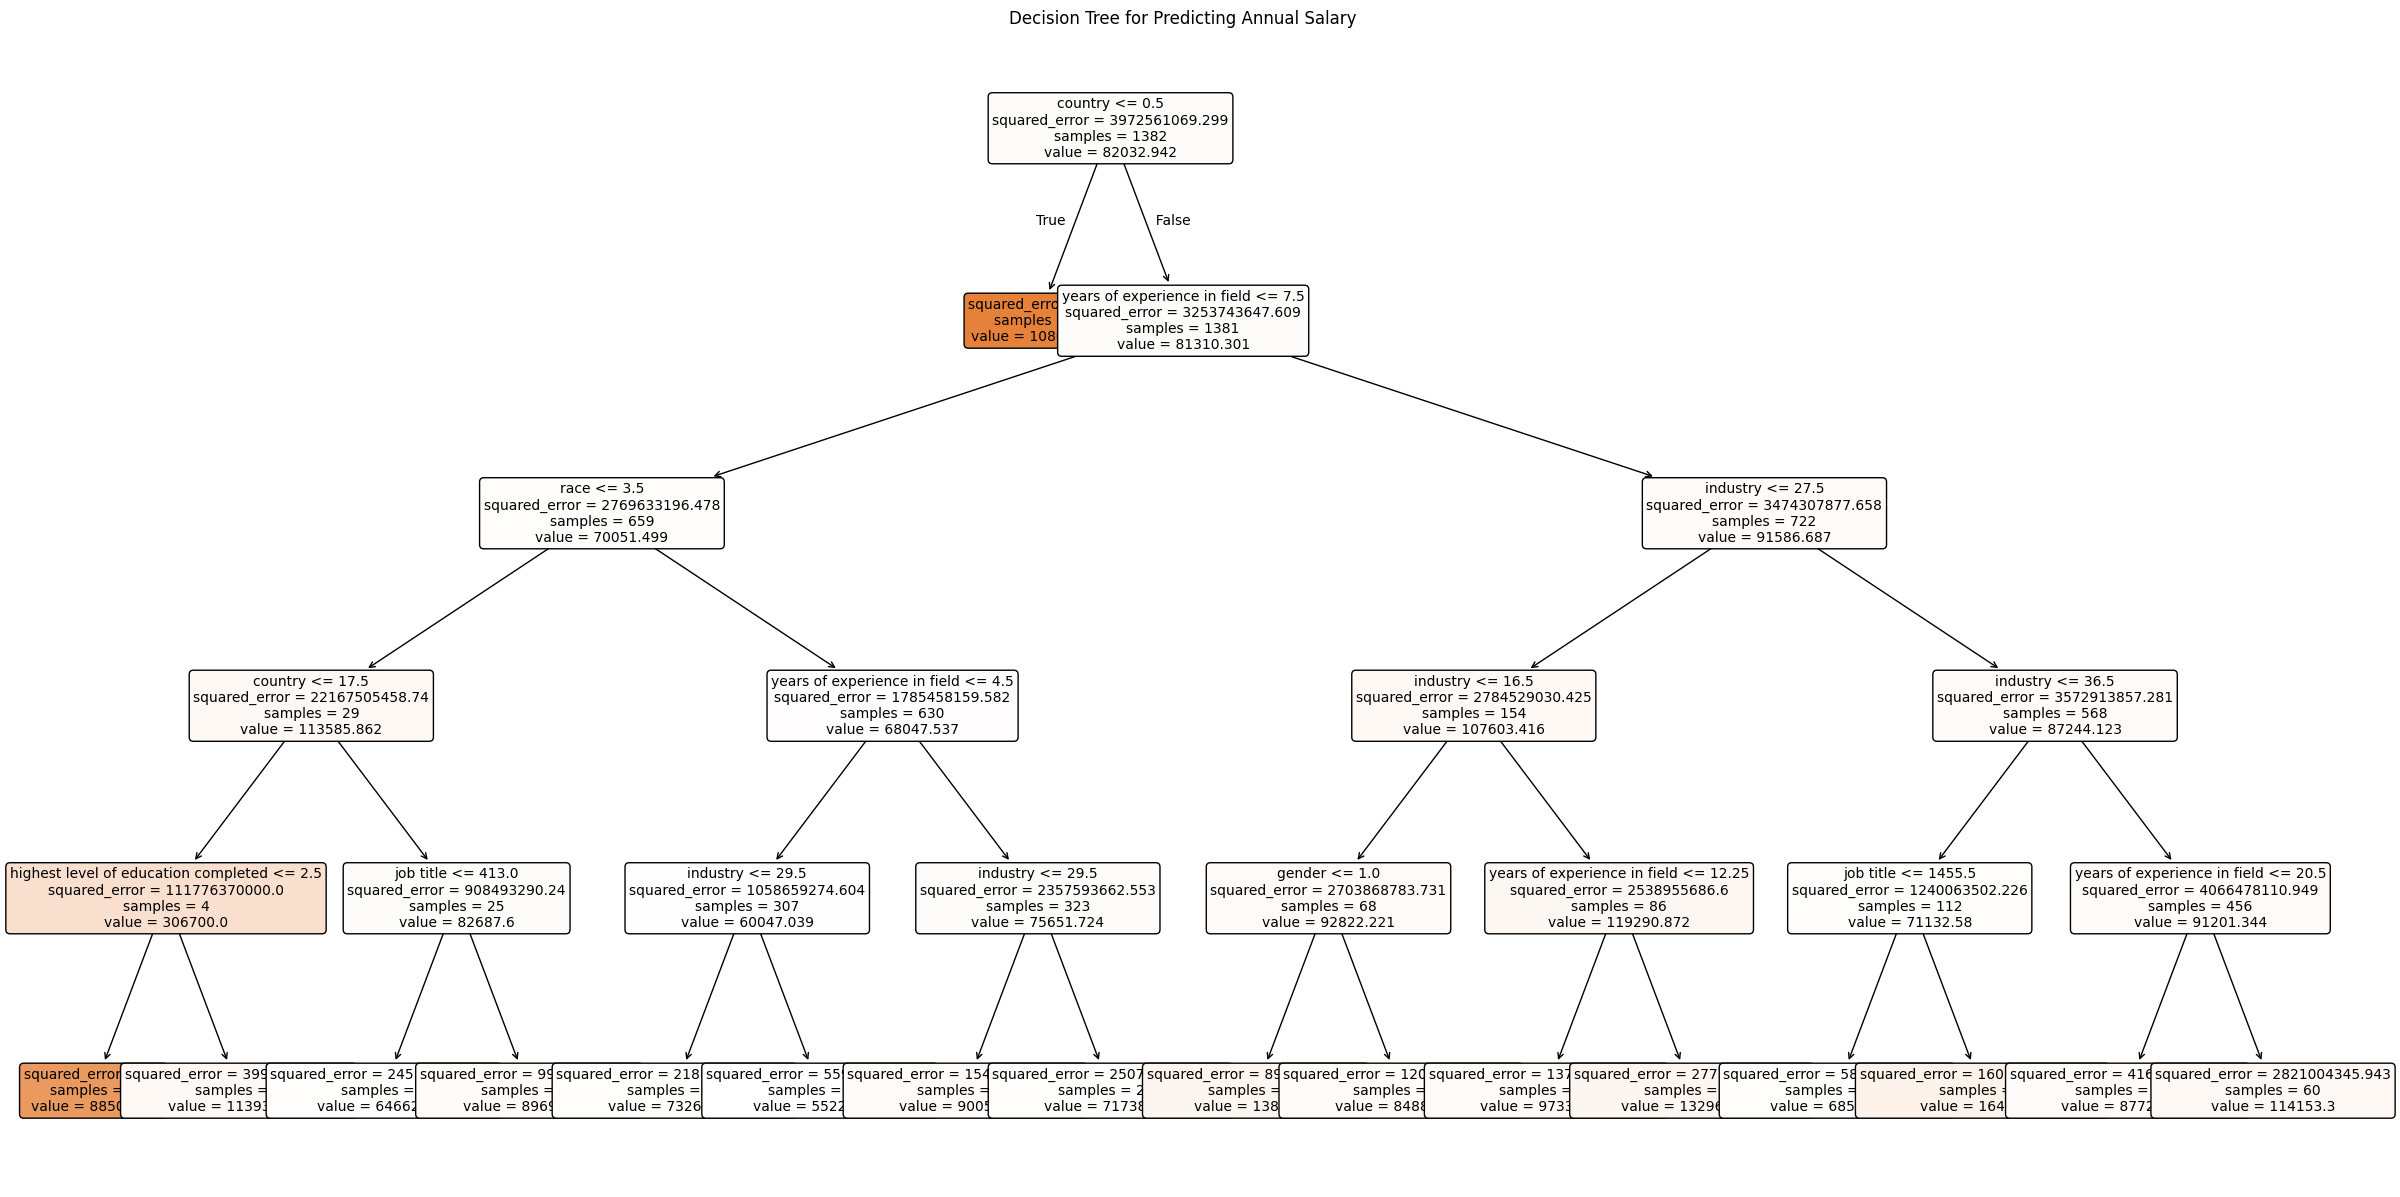

In [9]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Helper function to extract numeric value from a range string.
def extract_numeric_range(val):
    if isinstance(val, str):
        # Use regex to find all numbers in the string
        numbers = re.findall(r'\d+\.?\d*', val)
        if len(numbers) == 2:
            return (float(numbers[0]) + float(numbers[1])) / 2.0
        elif len(numbers) == 1:
            return float(numbers[0])
    # If conversion fails or not a string, return None
    return None

# Load the dataset
file_path = 'Ask A Manager Salary Survey 2021 (Responses).xlsx'
data = pd.read_excel(file_path, sheet_name='Form Responses 1')

# List of features and target
numeric_range_cols = ['how old are you?', 
                      'overall years of professional experience',
                      'years of experience in field']
categorical_cols = ['industry', 'job title', 'country', 
                    'highest level of education completed', 'gender', 'race']
target = 'annual salary'

# First, drop rows with missing target values
data = data.dropna(subset=[target])

# Process numeric range columns: extract the average numeric value
for col in numeric_range_cols:
    data[col] = data[col].apply(lambda x: extract_numeric_range(x) if isinstance(x, str) else x)
    
# For rows where conversion failed (None), drop them.
data = data.dropna(subset=numeric_range_cols)

# Fill missing values in categorical columns with 'Unknown'
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define final feature list (all features used)
features = numeric_range_cols + categorical_cols

# Prepare feature matrix and target vector
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the Decision Tree
plt.figure(figsize=(30, 15))  # Increased figure size for readability
plot_tree(regressor, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Predicting Annual Salary')
plt.show()
